Importando bibliotecas

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

import pandas as pd
import seaborn as sns

Lendo dataset de reclamações com document embeddings

In [3]:
frzd_claims = pd.read_parquet('../dataset/featured/frzd_telecom_pandemic_claims.parquet.snappy')

In [4]:
X = frzd_claims.values

Configurando algoritmo DBSCAN para clusterização das reclamações

In [5]:
clustering = DBSCAN(
    eps=.05,
    min_samples=5,
    metric='euclidean',
    algorithm='ball_tree',
    leaf_size=30,
    n_jobs=-1
)

Treinando algoritmo de clusterização

In [6]:
clustering.fit(X)

DBSCAN(algorithm='ball_tree', eps=0.05, n_jobs=-1)

In [7]:
clustering.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [8]:
frzd_claims['label'] = clustering.labels_

In [9]:
frzd_claims['label'].value_counts()

label
-1    27408
 0      886
Name: count, dtype: int64

Visualizando reclamações

In [10]:
tsne = TSNE(
    n_components=2,
    learning_rate='auto',
    init='random',
    perplexity=50,
    n_jobs=-1
)

In [11]:
X_embedded = tsne.fit_transform(X)

<Axes: >

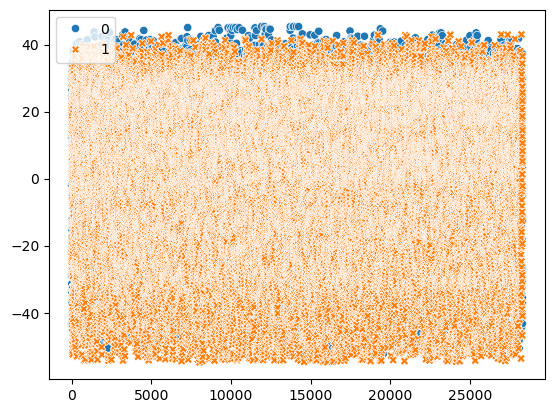

In [12]:
sns.scatterplot(data=X_embedded)